In [1]:
import ann

In [2]:
sizes = [2,4,3,1]
myann = ann.ann(sizes)

In [3]:
import numpy as np
# generate training and testing sets
def func(x):
    return np.sqrt(x[:,0]+x[:,1])

testing_x  = np.random.uniform(size=(100,2))
testing_y  = func(testing_x).reshape(-1,1)
training_x = np.random.uniform(size=(100,2))
training_y = func(training_x).reshape(-1,1)

In [4]:
# compute initial generalization loss
y,s,z = myann.forward_pass(testing_x, verbose=False)
err = np.mean((z[-1]-testing_y)**2)
print("Generalization loss estimate:",err)

Generalization loss estimate: 2.3159708853139533


In [5]:
nsteps = 1000
training_loss = np.zeros(nsteps)
testing_loss  = np.zeros(nsteps)

for i in range(nsteps):
    _,_,z_test = myann.forward_pass(testing_x, verbose=False)
    testing_loss[i]  = np.mean((z_test[-1]-testing_y)**2)
    y_train,s_train,z_train = myann.forward_pass(training_x, verbose=False)
    training_loss[i] = np.mean((z_train[-1]-training_y)**2)
    myann.backward_pass(training_y, y_train, s_train, z_train, 0.001)

last training loss: 0.03573600249861287
last generalization loss: 0.03377256106673076


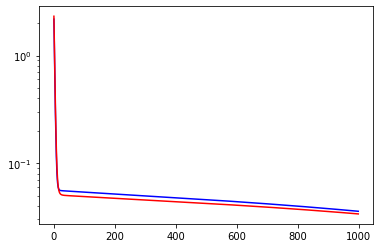

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.semilogy(training_loss, c='b')
plt.semilogy(testing_loss, c='r')
print("last training loss:", training_loss[-1])
print("last generalization loss:", testing_loss[-1])

last training loss: 0.0006721200012075267
last generalization loss: 0.0003236260790952486


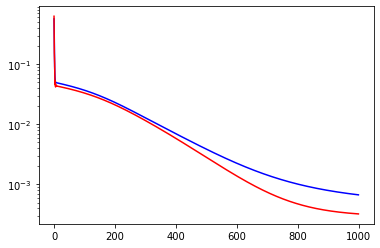

In [7]:
myann.reset_weights()
nsteps = 1000
training_loss = np.zeros(nsteps)
testing_loss  = np.zeros(nsteps)

for i in range(nsteps):
    _,_,z_test = myann.forward_pass(testing_x, verbose=False)
    testing_loss[i]  = np.mean((z_test[-1]-testing_y)**2)
    y_train,s_train,z_train = myann.forward_pass(training_x, verbose=False)
    training_loss[i] = np.mean((z_train[-1]-training_y)**2)
    myann.backward_pass(training_y, y_train, s_train, z_train, 0.005)
    
%matplotlib inline
import matplotlib.pyplot as plt

plt.semilogy(training_loss, c='b')
plt.semilogy(testing_loss, c='r')
print("last training loss:", training_loss[-1])
print("last generalization loss:", testing_loss[-1])